##### Importieren der notwendigen Bibliotheken:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Lesen der Verkaufsdaten

In [2]:
sales_df = pd.read_csv("../data/sales_clean.csv")
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,PublicHoliday,Easter,Christmas
0,1,5,2015-07-31,5263,555,1,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,0


##### Erstellung neuer Metriken

Wir werden die Daten von 942 aggregieren, um individuelle Leistungsberichte für jede der Filialen zu erstellen. Die Spalten `Date`, `DayOfWeek` und die Variablen zu den Feirtagen werden wir für diese Anlyse nicht brauchen.

In [3]:
sales_df.drop(['Date', 'DayOfWeek'], axis=1, inplace=True)
# Drop columns taht have to do with holidays
sales_df.drop(['SchoolHoliday', 'PublicHoliday', 'Easter', 'Christmas'], axis=1, inplace=True)

Und nun gruppieren wir die Daten auf `Store` Ebene

In [4]:
global_sales_df = sales_df.groupby('Store').sum()
# Rename columns
global_sales_df.rename({'Open': 'DaysOpen', 'Promo': 'DaysWithPromo'}, axis=1, inplace=True)
global_sales_df.head()

,Sales,Customers,DaysOpen,DaysWithPromo
Store,,,,
1,3716854,440523,781,360
2,3883858,457855,784,360
3,5408261,584310,779,360
4,7556507,1036254,784,360
5,3642818,418588,779,360


In der ersten Analyse haben wir festgestellt, dass ein enger Zusammenhang zwischen der Anzahl der Besucher in einer Filiale und deren Gewinn besteht. Es scheint auch Filialen zu geben, die wahrscheinlich aufgrund ihrer Standorte viel mehr Besucher als der Durchschnitt erhalten und daher einen viel höheren Umsatz haben. Andererseits sind nicht alle Filialen sonntags geöffnet, und einige waren mehrere Tage lang geschlossen.  
Aus diesen Gründen erscheint es sinnvoll, Variablen zu schaffen, die die Fähigkeit einer Filiale messen, die Besuche potenzieller Kunden in effektive Verkäufe umzuwandeln. Von daher erstellen drei neue Variablen: `SalesPerDay`, `CustomersPerDay` und `SalesPerCustomer`.

In [5]:
global_sales_df['SalesPerDay'] = global_sales_df['Sales'] / global_sales_df['DaysOpen']
global_sales_df['CustomersPerDay'] = global_sales_df['Customers'] / global_sales_df['DaysOpen']
global_sales_df['SalesPerCustomer'] = global_sales_df['Sales'] / global_sales_df['Customers']

Betrachten wir die deskriptiven Statistiken dieser Variablen:

In [6]:
global_sales_df.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,Sales,Customers,DaysOpen,DaysWithPromo,SalesPerDay,CustomersPerDay,SalesPerCustomer
count,1115.00000,1115.00000,1115.00000,1115.00000,1115.00000,1115.00000,1115.00000
mean,5267426.56771,577615.92377,757.30224,348.05381,6934.20845,754.51016,9.64376
std,1951304.48397,304654.53314,63.86113,27.23916,2383.91105,353.34441,1.98686
min,2114322.00000,187583.00000,592.00000,286.00000,2703.73657,240.18310,3.51370
25%,3949377.00000,405391.00000,776.00000,360.00000,5322.29997,541.46869,8.13186
50%,4990259.00000,509233.00000,779.00000,360.00000,6589.94847,678.66752,9.46406
75%,6084147.50000,671544.00000,782.00000,360.00000,7964.20064,866.20330,10.98117
max,19516842.00000,3206058.00000,942.00000,360.00000,21757.48342,3403.45860,16.16264


##### Verknüpfung mit den Daten der Filialen:

In [7]:
stores_df = pd.read_csv("../data/stores_clean.csv")
sales_stores_df = pd.merge(global_sales_df, stores_df, how = 'inner', on = 'Store')
sales_stores_df.set_index('Store', inplace=True)
sales_stores_df.head()

,Sales,Customers,DaysOpen,DaysWithPromo,SalesPerDay,CustomersPerDay,SalesPerCustomer,StoreType_a,StoreType_b,StoreType_c,...,COBefore2005-11-16,COBetween2005-11-16_2010-03-01,COAfter2010-03-01,Promo2,P2Jan,P2Feb,P2Mar,P2Before2011-04-04,P2Between2011-04-04_2013-02-04,P2After2013-02-04
Store,,,,,,,,,,,,,,,,,,,,,
1,3716854,440523,781,360,4759.096031,564.049936,8.437366,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,3883858,457855,784,360,4953.900510,583.998724,8.482725,1,0,0,...,0,1,0,1,1,0,0,1,0,0
3,5408261,584310,779,360,6942.568678,750.077022,9.255808,1,0,0,...,0,1,0,1,1,0,0,1,0,0
4,7556507,1036254,784,360,9638.401786,1321.752551,7.292138,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5,3642818,418588,779,360,4676.274711,537.340180,8.702634,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
sales_stores_df.columns

Index(['Sales', 'Customers', 'DaysOpen', 'DaysWithPromo', 'SalesPerDay',
       'CustomersPerDay', 'SalesPerCustomer', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment', 'CompetitionDistance',
       'COBefore2005-11-16', 'COBetween2005-11-16_2010-03-01',
       'COAfter2010-03-01', 'Promo2', 'P2Jan', 'P2Feb', 'P2Mar',
       'P2Before2011-04-04', 'P2Between2011-04-04_2013-02-04',
       'P2After2013-02-04'],
      dtype='object')

##### EDA mit den Daten der Filialen:

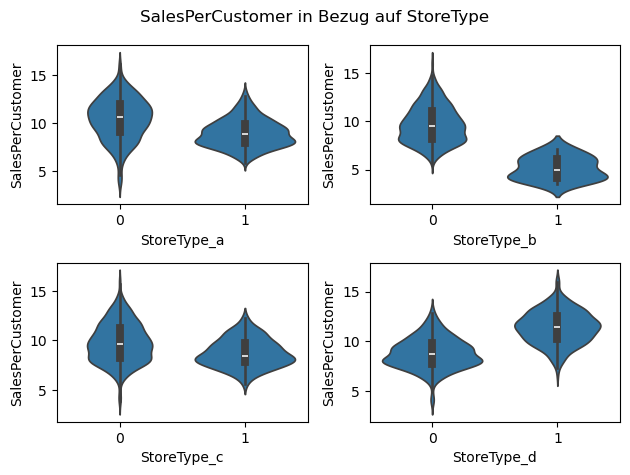

In [30]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)    
axes = axes.flatten()
cols = ['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d']

for ax, col in zip(axes, cols):
    sns.violinplot(data=sales_stores_df, x=col, y='SalesPerCustomer', ax=ax)

fig.suptitle("SalesPerCustomer in Bezug auf StoreType")
fig.tight_layout();

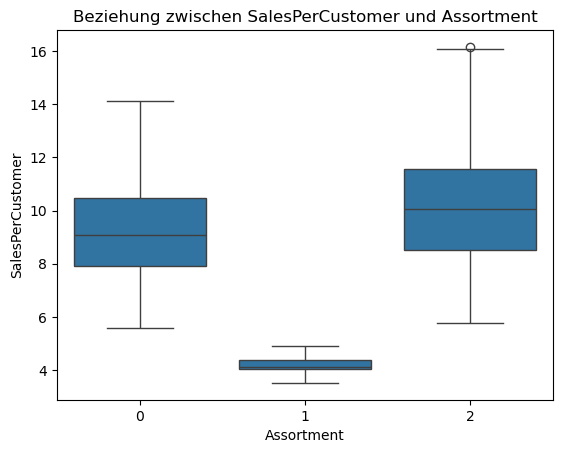

In [31]:
sns.boxplot(x='Assortment', y='SalesPerCustomer', data=sales_stores_df).set(title="Beziehung zwischen SalesPerCustomer und Assortment");

##### Gesamtbericht zur Leistung/ Performance aller Rossmann Filialen

##### Individuelle Filial-Berichte